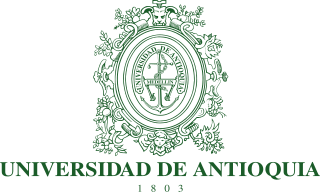

# **Entregable 2 - Introducción a la Inteligencia Artificial**

Estudiante:
- Ana María Uribe Betancur - CC 1000537653


Donde se muestra cómo cargas el archivo train.csv de la competencia y realizas las operaciones de limpieza y preprocesado de datos que necesites (p.ej. convertir columnas en one-hot, normalizar valores de rangos, imputar datos faltantes, etc.)

In [39]:
# Importación de las librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from sklearn.preprocessing import LabelEncoder
import zipfile
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [40]:
df_train = pd.read_csv("train.csv")
df_train

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


Inicialmente, se visualizan las características de las variables (datos no nulos, tipo de datos), para establecer cómo abordar el preprocesamiento.

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

## 1. Limpieza de datos

### Tratar valores duplicados

Se busca si en el dataset existen valores duplicados. Como no existen, se continúa con la limpieza.

In [42]:
print(f"Datos duplicados por variable: {df_train.duplicated().sum()}")

Datos duplicados por variable: 0


### Tratar valores nulos

Se buscan los valores nulos y el porcentaje que representan respecto al dataset completo. El porcentaje máximo de valores nulos identificado en el conjunto de datos corresponde a la variable F_TIENEAUTOMOVIL, con un 6.30 % de registros faltantes. Este nivel de ausencia de información se considera razonable y manejable dentro de los estándares comunes en análisis de datos. En términos prácticos, una proporción de datos faltantes inferior al 10 % no suele comprometer la representatividad del conjunto ni introduce sesgos significativos en las estimaciones estadísticas, especialmente cuando los valores faltantes no muestran un patrón sistemático (que se observará más adelante).

In [43]:
# Calcular número y porcentaje de nulos por columna
nulos_abs = df_train.isnull().sum()
nulos_pct = (nulos_abs / len(df_train)) * 100

# Combinar en un solo DataFrame
nulos_df = pd.DataFrame({
    "Valores nulos": nulos_abs,
    "Porcentaje (%)": nulos_pct.round(2)
}).sort_values(by="Porcentaje (%)", ascending=False)

# Mostrar resultados
print("        Porcentaje de valores nulos por variable\n")
print(nulos_df.to_string())

        Porcentaje de valores nulos por variable

                             Valores nulos  Porcentaje (%)
F_TIENEAUTOMOVIL                     43623            6.30
F_TIENELAVADORA                      39773            5.74
F_TIENECOMPUTADOR                    38103            5.50
F_ESTRATOVIVIENDA                    32137            4.64
E_HORASSEMANATRABAJA                 30857            4.46
F_TIENEINTERNET.1                    26629            3.85
F_TIENEINTERNET                      26629            3.85
F_EDUCACIONMADRE                     23664            3.42
F_EDUCACIONPADRE                     23178            3.35
E_PAGOMATRICULAPROPIO                 6498            0.94
E_VALORMATRICULAUNIVERSIDAD           6287            0.91
PERIODO_ACADEMICO                        0            0.00
ID                                       0            0.00
E_PRGM_DEPARTAMENTO                      0            0.00
E_PRGM_ACADEMICO                         0            0.00
E_PRIV

Durante la exploración de datos es fundamental analizar tanto las variables numéricas como las categóricas, ya que cada tipo requiere un enfoque de visualización distinto.

Para las variables numéricas, los histogramas con estimación de densidad (KDE) permiten observar la distribución de los valores, identificar sesgos, detectar posibles valores atípicos y analizar patrones generales en los datos. Adicionalmente, la representación de los valores nulos mediante barras de distinto color facilita visualizar qué proporción de la variable carece de información. Para la imputación de estas variables, se recomienda utilizar la media en casos de distribuciones simétricas y la mediana cuando la distribución esté sesgada, dado que la mediana es más robusta frente a valores extremos y preserva la estructura de la distribución original.

En el caso de las variables categóricas, se emplean gráficos de barras que muestran las categorías más frecuentes y, cuando existen valores nulos, se añade una categoría denominada "Nulos" para representar su cantidad.

Lo anterior es implementado en el siguiente código, que además imprime una recomedación de procesamiento por variable.

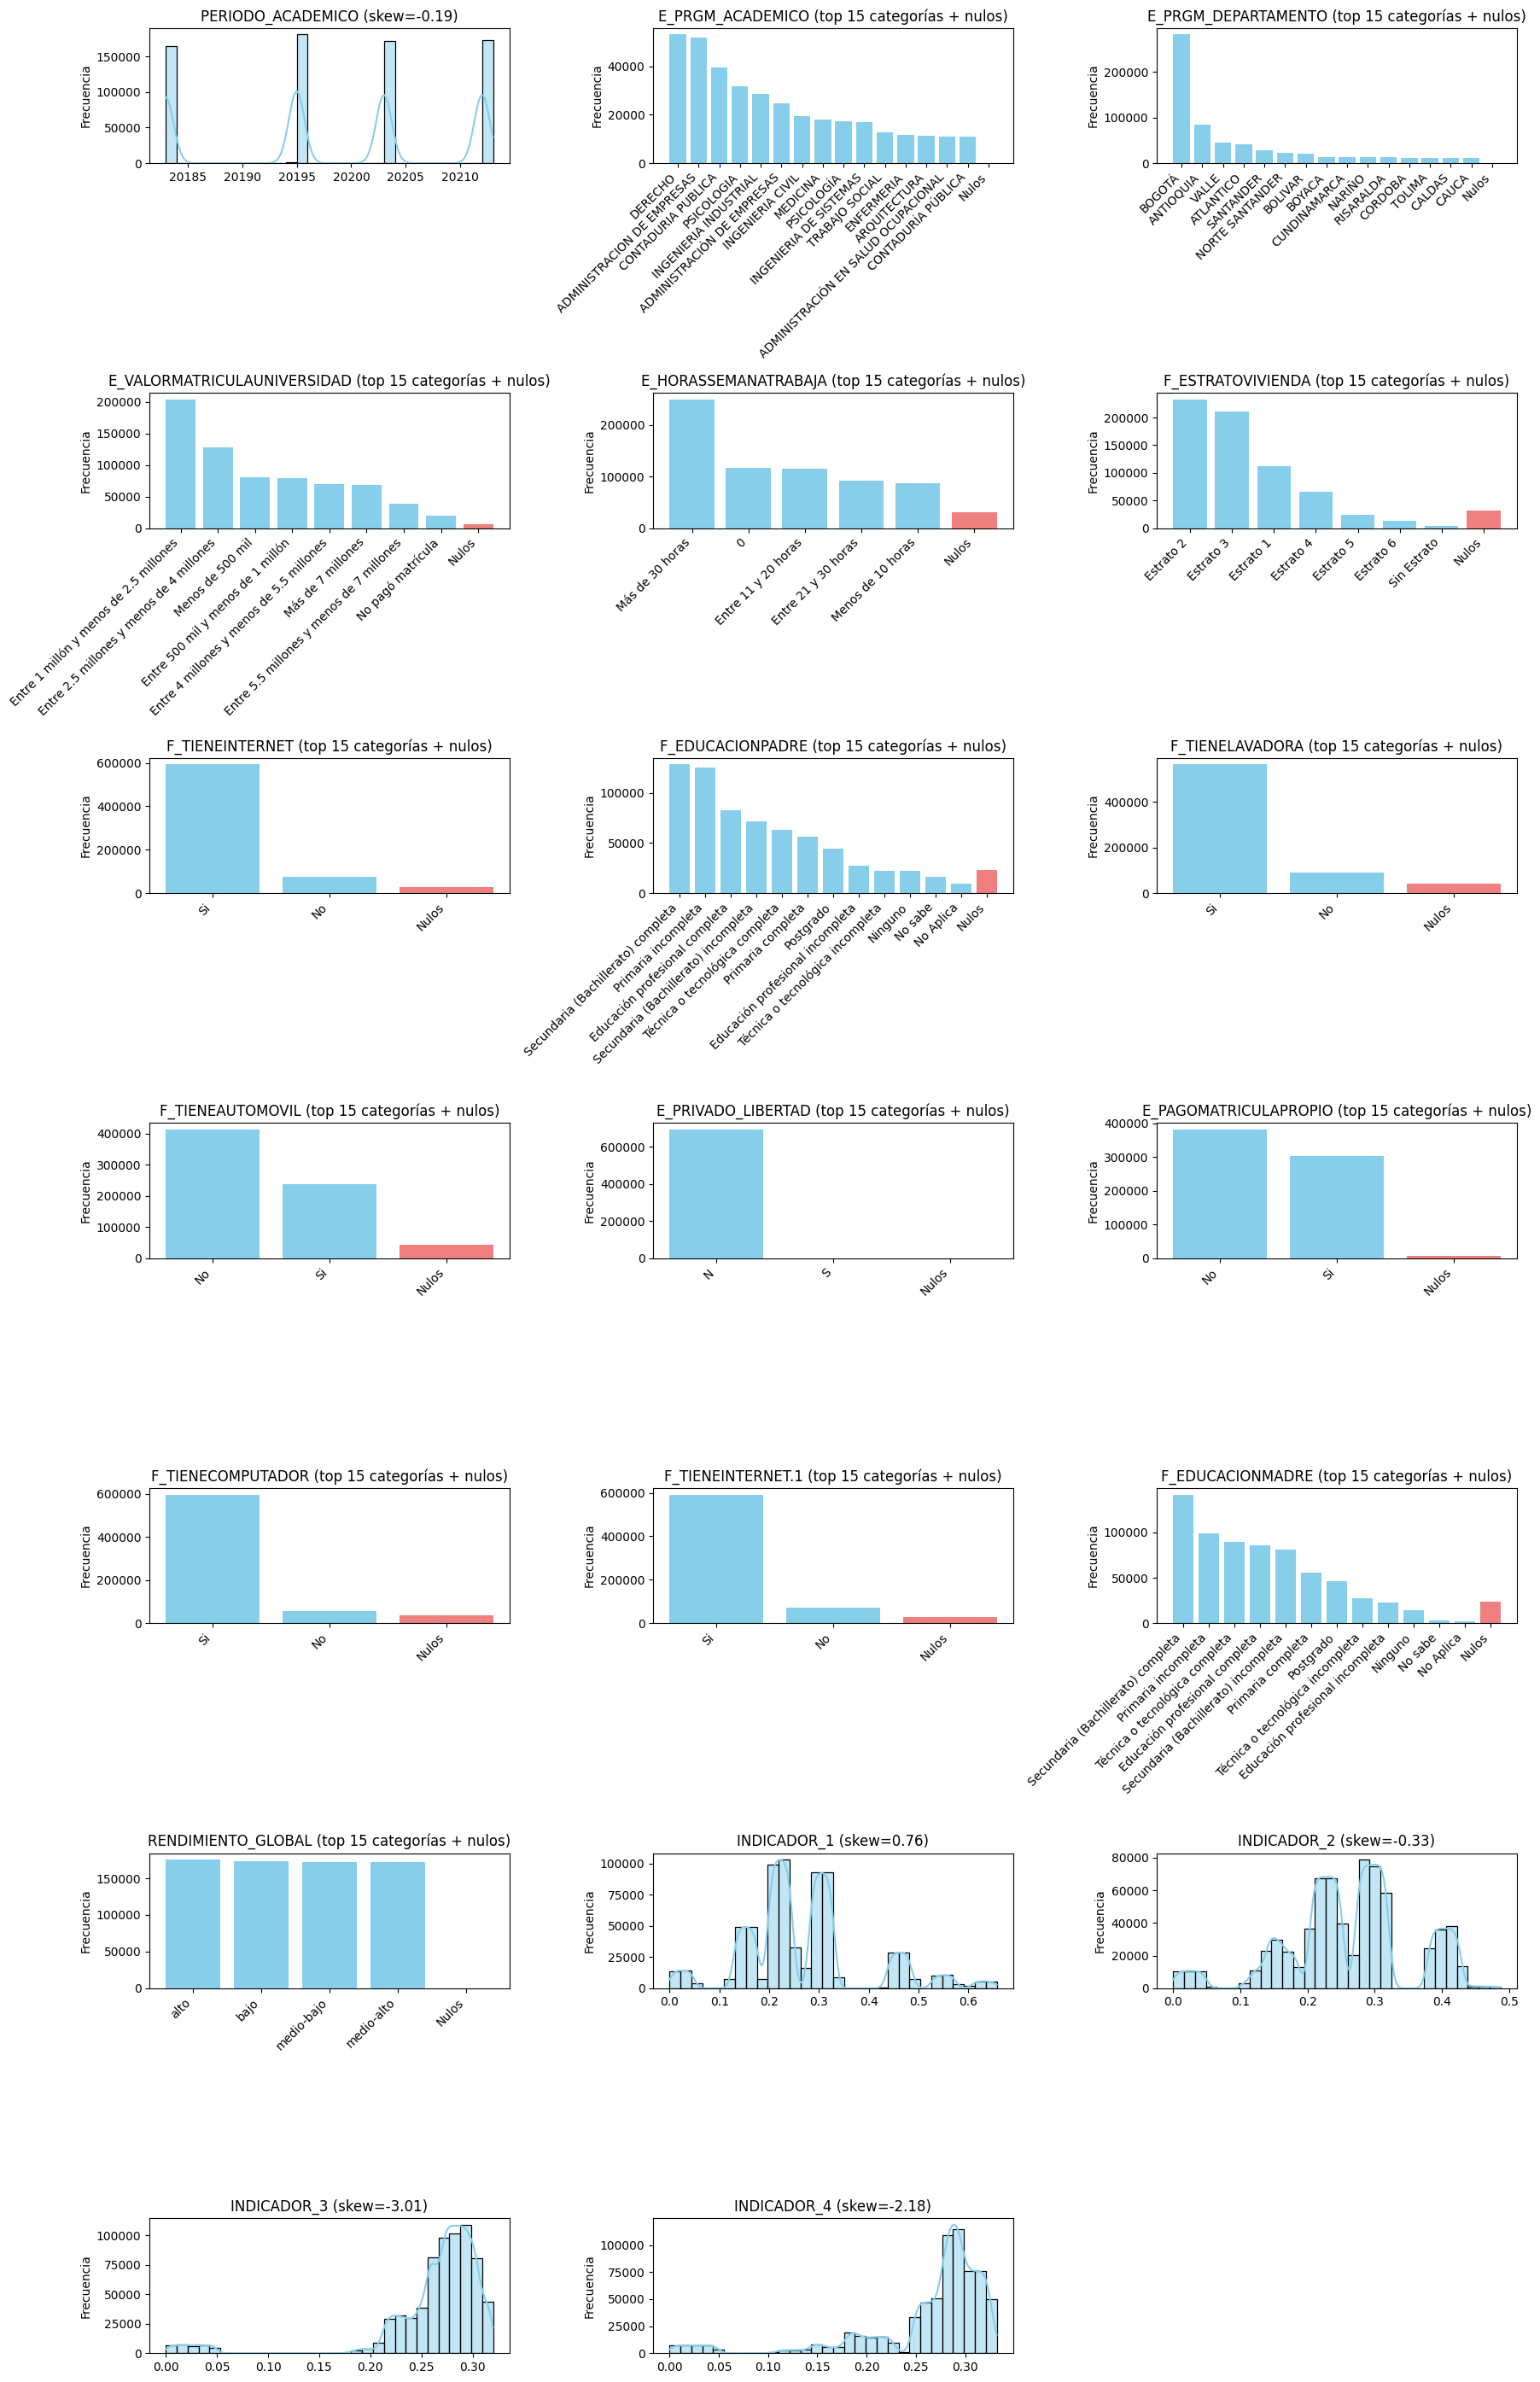


Recomendaciones de imputación por variable

PERIODO_ACADEMICO: Numérica simétrica → imputar con MEDIA o MEDIANA
E_PRGM_ACADEMICO: Categórica (948 categorías) → imputar con MODA o crear 'No reporta'
E_PRGM_DEPARTAMENTO: Categórica (31 categorías) → imputar con MODA o crear 'No reporta'
E_VALORMATRICULAUNIVERSIDAD: Categórica (8 categorías) → imputar con MODA
E_HORASSEMANATRABAJA: Categórica (5 categorías) → imputar con MODA
F_ESTRATOVIVIENDA: Categórica (7 categorías) → imputar con MODA
F_TIENEINTERNET: Categórica (2 categorías) → imputar con MODA
F_EDUCACIONPADRE: Categórica (12 categorías) → imputar con MODA o crear 'No reporta'
F_TIENELAVADORA: Categórica (2 categorías) → imputar con MODA
F_TIENEAUTOMOVIL: Categórica (2 categorías) → imputar con MODA
E_PRIVADO_LIBERTAD: Categórica (2 categorías) → imputar con MODA
E_PAGOMATRICULAPROPIO: Categórica (2 categorías) → imputar con MODA
F_TIENECOMPUTADOR: Categórica (2 categorías) → imputar con MODA
F_TIENEINTERNET.1: Categórica (2 catego

In [44]:
copy = df_train.copy().drop(columns=["ID"])

# Detectar columnas numéricas y categóricas
num_cols = copy.select_dtypes(include=["int64", "float64"]).columns
cat_cols = copy.select_dtypes(exclude=["int64", "float64"]).columns

# Configurar figura para todos los subplots
total_vars = len(copy.columns)
cols_plot = 3
rows_plot = -(-total_vars // cols_plot)

fig, axes = plt.subplots(rows_plot, cols_plot, figsize=(18, rows_plot*4))
axes = axes.flatten()

recomendaciones = []

for i, col in enumerate(copy.columns):
    ax = axes[i]

    nulos = copy[col].isnull().sum()
    pct_nulos = nulos / len(copy) * 100

    if col in num_cols:
        # Numérica: histograma con KDE
        sns.histplot(copy[col], kde=True, bins=30, color="skyblue", ax=ax)
        if nulos > 0:
            ax.bar("Nulos", nulos, color="lightcoral", alpha=0.6)
        skewness = copy[col].skew()
        if abs(skewness) < 1:
            recomend = "Numérica simétrica → imputar con MEDIA o MEDIANA"
        else:
            recomend = "Numérica sesgada → imputar con MEDIANA"
        ax.set_title(f"{col} (skew={skewness:.2f})")

    else:
        # Categórica: usar ax.bar para evitar warning de palette
        counts = copy[col].value_counts()
        top_categories = counts.index[:15]
        top_values = counts.values[:15]

        categorias = list(top_categories) + ["Nulos"]
        valores = list(top_values) + [nulos]
        colores = ["skyblue"] * len(top_categories) + ["lightcoral"]

        ax.bar(categorias, valores, color=colores)

        n_unique = copy[col].nunique()
        if n_unique <= 10:
            recomend = f"Categórica ({n_unique} categorías) → imputar con MODA"
        else:
            recomend = f"Categórica ({n_unique} categorías) → imputar con MODA o crear 'No reporta'"

        ax.set_title(f"{col} (top 15 categorías + nulos)")
        ax.set_xticks(range(len(categorias)))
        ax.set_xticklabels(categorias, rotation=45, ha="right")

    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")
    recomendaciones.append(f"{col}: {recomend}")

# Ajustar layout y eliminar ejes sobrantes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Imprimir recomendaciones
print("\nRecomendaciones de imputación por variable\n")
for r in recomendaciones:
    print(r)

A continuación, se imputan las variables según las recomendaciones específicas del código anterior.

In [45]:
# Crear una copia del DataFrame original para no modificarlo directamente
df_imputado = copy.copy()

# Diccionario con las reglas derivadas del análisis exploratorio
recomendaciones = {
    # Numéricas simétricas → media
    'INDICADOR_1': 'media',
    'INDICADOR_2': 'media',

    # Numéricas sesgadas → mediana
    'INDICADOR_3': 'mediana',
    'INDICADOR_4': 'mediana',

    # Categóricas → moda (o "No reporta" si aplica)
    'PERIODO_ACADEMICO': 'moda',
    'E_PRGM_ACADEMICO': 'moda',
    'E_PRGM_DEPARTAMENTO': 'moda',
    'E_VALORMATRICULAUNIVERSIDAD': 'moda',
    'E_HORASSEMANATRABAJA': 'moda',
    'F_ESTRATOVIVIENDA': 'moda',
    'F_TIENEINTERNET': 'moda',
    'F_EDUCACIONPADRE': 'moda',
    'F_TIENELAVADORA': 'moda',
    'F_TIENEAUTOMOVIL': 'moda',
    'E_PRIVADO_LIBERTAD': 'moda',
    'E_PAGOMATRICULAPROPIO': 'moda',
    'F_TIENECOMPUTADOR': 'moda',
    'F_TIENEINTERNET.1': 'moda',
    'F_EDUCACIONMADRE': 'moda',
    'RENDIMIENTO_GLOBAL': 'moda'
}

# Aplicar imputación variable por variable
for col, metodo in recomendaciones.items():
    if col in df_imputado.columns:
        if metodo == 'media':
            valor = df_imputado[col].mean()
            df_imputado[col] = df_imputado[col].fillna(valor)
        elif metodo == 'mediana':
            valor = df_imputado[col].median()
            df_imputado[col] = df_imputado[col].fillna(valor)
        elif metodo == 'moda':
            valor = df_imputado[col].mode().iloc[0]
            df_imputado[col] = df_imputado[col].fillna(valor)
        print(f"{col}: imputado con {metodo} ('{valor}')")

# Verificar que no queden nulos
print("\nValores nulos después de la imputación:")
print(df_imputado.isnull().sum().sort_values(ascending=False).head(10))

INDICADOR_1: imputado con media ('0.26862912057761734')
INDICADOR_2: imputado con media ('0.25999581227436824')
INDICADOR_3: imputado con mediana ('0.276')
INDICADOR_4: imputado con mediana ('0.285')
PERIODO_ACADEMICO: imputado con moda ('20195')
E_PRGM_ACADEMICO: imputado con moda ('DERECHO')
E_PRGM_DEPARTAMENTO: imputado con moda ('BOGOTÁ')
E_VALORMATRICULAUNIVERSIDAD: imputado con moda ('Entre 1 millón y menos de 2.5 millones')
E_HORASSEMANATRABAJA: imputado con moda ('Más de 30 horas')
F_ESTRATOVIVIENDA: imputado con moda ('Estrato 2')
F_TIENEINTERNET: imputado con moda ('Si')
F_EDUCACIONPADRE: imputado con moda ('Secundaria (Bachillerato) completa')
F_TIENELAVADORA: imputado con moda ('Si')
F_TIENEAUTOMOVIL: imputado con moda ('No')
E_PRIVADO_LIBERTAD: imputado con moda ('N')
E_PAGOMATRICULAPROPIO: imputado con moda ('No')
F_TIENECOMPUTADOR: imputado con moda ('Si')
F_TIENEINTERNET.1: imputado con moda ('Si')
F_EDUCACIONMADRE: imputado con moda ('Secundaria (Bachillerato) completa

### Tratar outliers

Se busca si en el dataset existen valores atípicos.

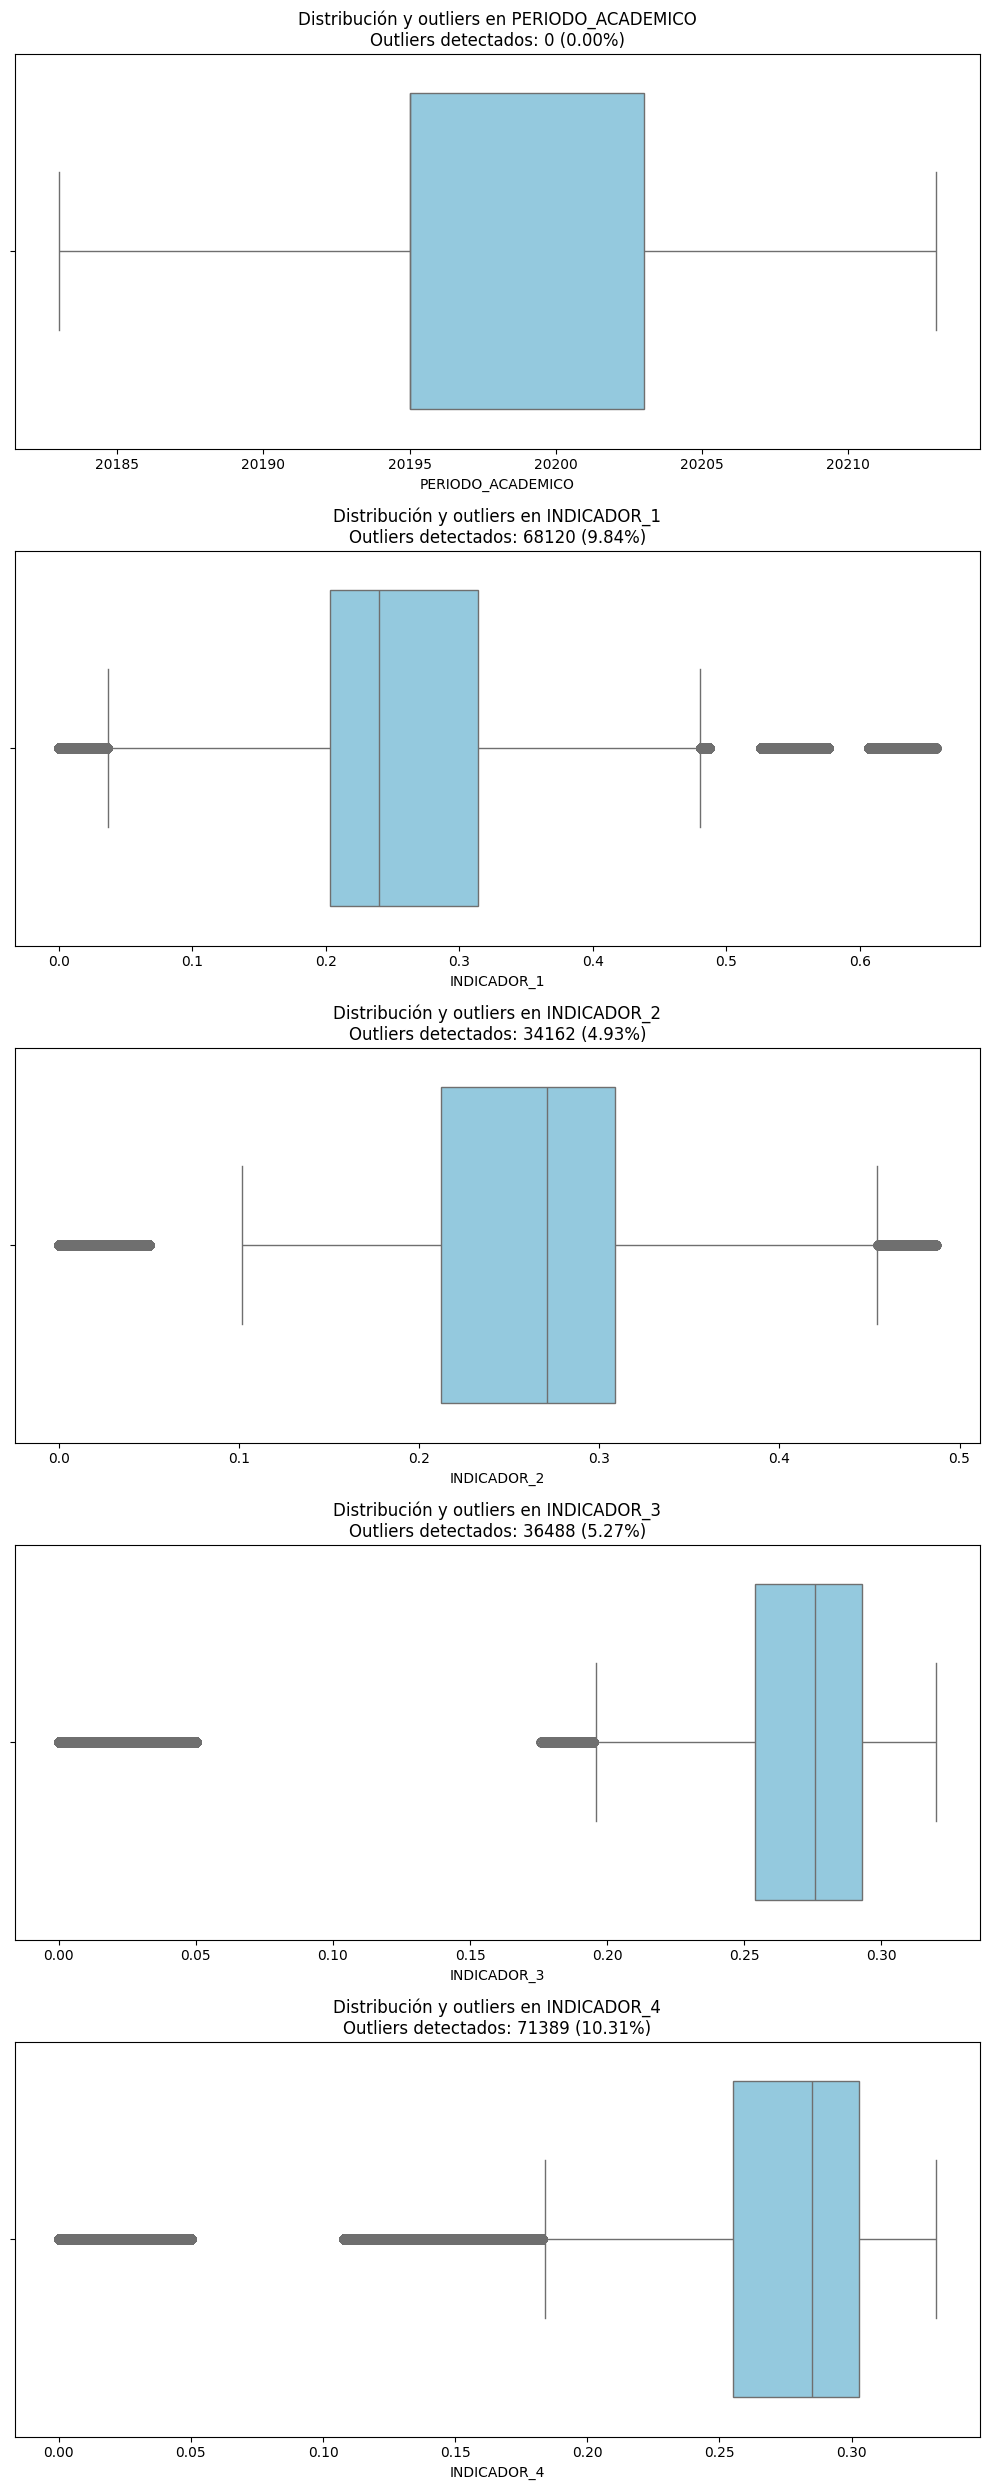

,Variable,Outliers detectados,% del total
4,INDICADOR_4,71389,10.31
1,INDICADOR_1,68120,9.84
3,INDICADOR_3,36488,5.27
2,INDICADOR_2,34162,4.93
0,PERIODO_ACADEMICO,0,0.00


In [46]:
# Seleccionar solo las variables numéricas
num_cols = df_imputado.select_dtypes(include=["int64", "float64"]).columns

# Crear figura general con subplots
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 5 * len(num_cols)))

if len(num_cols) == 1:
    axes = [axes]  # asegurar iterable

outlier_summary = []  # almacenar resumen

for ax, col in zip(axes, num_cols):
    Q1 = df_imputado[col].quantile(0.25)
    Q3 = df_imputado[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    mask_outliers = (df_imputado[col] < lower_bound) | (df_imputado[col] > upper_bound)
    num_outliers = mask_outliers.sum()
    perc_outliers = (num_outliers / len(df_imputado)) * 100

    outlier_summary.append({
        "Variable": col,
        "Outliers detectados": num_outliers,
        "% del total": round(perc_outliers, 2)
    })

    # Graficar
    sns.boxplot(x=df_imputado[col], ax=ax, color="skyblue")
    ax.set_title(f"Distribución y outliers en {col}\nOutliers detectados: {num_outliers} ({perc_outliers:.2f}%)")
    ax.set_xlabel(col)
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df.sort_values(by="% del total", ascending=False))

Los outliers en los indicadores de rendimiento probablemente no son errores de medición, sino observaciones extremas pero legítimas. Por ejemplo, un estudiante con una nota muy alta o muy baja podría ser una señal valiosa sobre desempeño real, esfuerzo, o condiciones externas. En modelos predictivos, estos casos pueden ser precisamente los que ayudan al algoritmo a aprender los límites del fenómeno.

Por lo anterior, se decidió no tratar los outliers mediante eliminación. En el proceso de estandarización los pesos específicos de estos indicadores puede reducirse.

## 2. Recodificación


### Diagnóstico inicial

Antes de realizar cualquier recodificación, es necesario efectuar un diagnóstico exhaustivo de los datos para garantizar que las transformaciones posteriores sean coherentes con la naturaleza de cada variable. En primer lugar, se deben inspeccionar los tipos de datos mediante `df.dtypes` y analizar el número de valores únicos con `df.nunique()`, lo que permite identificar patrones generales y posibles inconsistencias en la estructura del dataset. A partir de esta información, se realiza una clasificación preliminar entre variables numéricas y categóricas, no únicamente con base en el tipo de dato detectado por Python, sino considerando su significado dentro del contexto del estudio.

Este diagnóstico inicial permite construir un mapa de recodificación confiable antes de modificar el contenido de las variables, asegurando que cada transformación preserve la integridad y el significado original de los datos.

In [47]:
# Copia del dataframe imputado (para no modificarlo directamente)
df_diag = df_imputado.copy()

# Crear un resumen general de tipos de datos
diagnostico = pd.DataFrame({
    'Tipo_actual': df_diag.dtypes.astype(str),
    'Nulos (%)': (df_diag.isnull().mean() * 100).round(2),
    'Valores_únicos': df_diag.nunique(),
    'Ejemplo_valores': df_diag.apply(lambda x: x.dropna().unique()[:5])
})

# Función para inferir tipo conceptual de variable
def inferir_tipo_conceptual(col):
    serie = df_diag[col].dropna()
    if serie.empty:
        return "Indefinido"

    # Si es numérica, analizar cantidad de valores únicos
    if np.issubdtype(serie.dtype, np.number):
        if serie.nunique() < 15:
            return "Categórica (numérica codificada)"
        else:
            return "Numérica"

    # Si no es numérica, verificar si contiene números en formato texto
    else:
        try:
            serie.astype(float)
            return "Numérica mal tipificada"
        except:
            return "Categórica (texto)"

# Aplicar la función de inferencia
diagnostico['Tipo_inferido'] = diagnostico.index.map(inferir_tipo_conceptual)

# Ordenar y limpiar el resultado
diagnostico = diagnostico.sort_values(by='Tipo_inferido').reset_index().rename(columns={'index': 'Variable'})

# Mostrar el diagnóstico general
print("\nDIAGNÓSTICO INICIAL DE VARIABLES")
display(diagnostico)

# Mostrar estadísticas de las columnas numéricas
print("\nESTADÍSTICAS NUMÉRICAS")
display(df_diag.describe().T)



DIAGNÓSTICO INICIAL DE VARIABLES


,Variable,Tipo_actual,Nulos (%),Valores_únicos,Ejemplo_valores,Tipo_inferido
0,PERIODO_ACADEMICO,int64,0.0,9,"[20212, 20203, 20195, 20183, 20194]",Categórica (numérica codificada)
1,RENDIMIENTO_GLOBAL,object,0.0,4,"[medio-alto, bajo, alto, medio-bajo]",Categórica (texto)
2,F_EDUCACIONMADRE,object,0.0,12,"[Postgrado, Técnica o tecnológica incompleta, ...",Categórica (texto)
3,F_TIENEINTERNET.1,object,0.0,2,"[Si, No]",Categórica (texto)
4,F_TIENECOMPUTADOR,object,0.0,2,"[Si, No]",Categórica (texto)
5,E_PAGOMATRICULAPROPIO,object,0.0,2,"[No, Si]",Categórica (texto)
6,E_PRIVADO_LIBERTAD,object,0.0,2,"[N, S]",Categórica (texto)
7,F_TIENELAVADORA,object,0.0,2,"[Si, No]",Categórica (texto)
8,F_TIENEAUTOMOVIL,object,0.0,2,"[Si, No]",Categórica (texto)
9,F_TIENEINTERNET,object,0.0,2,"[Si, No]",Categórica (texto)



ESTADÍSTICAS NUMÉRICAS


,count,mean,std,min,25%,50%,75%,max
PERIODO_ACADEMICO,692500.0,20198.366679,10.535037,20183.0,20195.000,20195.000,20203.000,20213.000
INDICADOR_1,692500.0,0.268629,0.122130,0.0,0.203,0.240,0.314,0.657
INDICADOR_2,692500.0,0.259996,0.093480,0.0,0.212,0.271,0.309,0.487
INDICADOR_3,692500.0,0.262087,0.058862,0.0,0.254,0.276,0.293,0.320
INDICADOR_4,692500.0,0.262903,0.067944,0.0,0.255,0.285,0.303,0.332


### Recodificación semántica

El objetivo de esta etapa es redefinir cada variable conforme a su naturaleza conceptual, garantizando que los valores representen de manera precisa y coherente la información que contienen. Este proceso implica traducir valores numéricos a etiquetas comprensibles para facilitar su interpretación, reagrupar categorías con baja frecuencia en niveles comunes que reduzcan la dispersión de datos y estandarizar la forma en que las categorías son presentadas. Asimismo, se corrigen inconsistencias derivadas de diferencias en mayúsculas, minúsculas o espacios, como ocurre con respuestas duplicadas del tipo “Sí”, “si” o “SI”. En los casos en que existan variables ordinales, como los niveles educativos o los estratos socioeconómicos, se procede a reetiquetarlas siguiendo un orden lógico. En conjunto, esta fase se apoya en el conocimiento contextual del conjunto de datos y busca asegurar la coherencia semántica y estructural de las variables antes de aplicar cualquier técnica de codificación automática o análisis estadístico.

In [48]:
# Copiar el dataframe imputado para trabajar con seguridad
df_recode = df_diag.copy()

# Listas según diagnóstico previo
variables_numericas = [
    "INDICADOR_1", "INDICADOR_2", "INDICADOR_3", "INDICADOR_4"
]

variables_categoricas = [
    "PERIODO_ACADEMICO", "E_PRGM_ACADEMICO", "E_PRGM_DEPARTAMENTO",
    "E_VALORMATRICULAUNIVERSIDAD", "E_HORASSEMANATRABAJA", "F_ESTRATOVIVIENDA",
    "F_TIENEINTERNET", "F_EDUCACIONPADRE", "F_TIENELAVADORA", "F_TIENEAUTOMOVIL",
    "E_PRIVADO_LIBERTAD", "E_PAGOMATRICULAPROPIO", "F_TIENECOMPUTADOR",
    "F_TIENEINTERNET.1", "F_EDUCACIONMADRE", "RENDIMIENTO_GLOBAL"
]

# Conversión de tipos de datos
for col in variables_numericas:
    df_recode[col] = pd.to_numeric(df_recode[col], errors='coerce')

for col in variables_categoricas:
    df_recode[col] = df_recode[col].astype('category')

# Validación del resultado
print("\nTIPOS DE DATOS DESPUÉS DE LA RECODIFICACIÓN\n")
print(df_recode.dtypes)

# Confirmar recuento de categorías y valores únicos
print("\nRESUMEN DE DATOS ÚNICOS POR VARIABLE CATEGÓRICA")
display(df_recode[variables_categoricas].nunique())


TIPOS DE DATOS DESPUÉS DE LA RECODIFICACIÓN

PERIODO_ACADEMICO              category
E_PRGM_ACADEMICO               category
E_PRGM_DEPARTAMENTO            category
E_VALORMATRICULAUNIVERSIDAD    category
E_HORASSEMANATRABAJA           category
F_ESTRATOVIVIENDA              category
F_TIENEINTERNET                category
F_EDUCACIONPADRE               category
F_TIENELAVADORA                category
F_TIENEAUTOMOVIL               category
E_PRIVADO_LIBERTAD             category
E_PAGOMATRICULAPROPIO          category
F_TIENECOMPUTADOR              category
F_TIENEINTERNET.1              category
F_EDUCACIONMADRE               category
RENDIMIENTO_GLOBAL             category
INDICADOR_1                     float64
INDICADOR_2                     float64
INDICADOR_3                     float64
INDICADOR_4                     float64
dtype: object

RESUMEN DE DATOS ÚNICOS POR VARIABLE CATEGÓRICA


,0
PERIODO_ACADEMICO,9
E_PRGM_ACADEMICO,948
E_PRGM_DEPARTAMENTO,31
E_VALORMATRICULAUNIVERSIDAD,8
E_HORASSEMANATRABAJA,5
F_ESTRATOVIVIENDA,7
F_TIENEINTERNET,2
F_EDUCACIONPADRE,12
F_TIENELAVADORA,2
F_TIENEAUTOMOVIL,2


Convertir columnas de object a category no altera los datos pero sí formaliza su naturaleza discreta y aporta beneficios prácticos, reduce uso de memoria y acelera operaciones al almacenar internamente categorías como códigos enteros, comunica explícitamente que la variable representa clases o niveles (mejorando la claridad semántica para el equipo y el modelado) y facilita la codificación posterior (LabelEncoder u OneHotEncoder) al trabajar sobre un conjunto fijo de categorías, evitando problemas con valores nuevos o inconsistentes.

### Codificación de variables categóricas

Una vez que las variables categóricas han sido limpiadas y estandarizadas, el siguiente paso consiste en transformarlas en una representación numérica que los modelos estadísticos y de machine learning puedan interpretar. Este proceso debe elegirse con base en la naturaleza de cada variable. Para variables nominales (aquellas sin un orden lógico, como el tipo de programa académico o el departamento), la estrategia más apropiada es el One-Hot Encoding, que crea columnas binarias independientes para cada categoría. En cambio, para variables ordinales (como el nivel educativo o el estrato), conviene utilizar Label Encoding o asignar manualmente valores enteros que reflejen su jerarquía. Esta distinción evita distorsionar relaciones entre las variables y garantiza que los algoritmos interpreten correctamente la información. En todo caso, la codificación debe preservarse en un mapeo reproducible para aplicarla de igual forma sobre los datos de prueba o nuevas observaciones.

In [49]:
# Seleccionar variables categóricas en el dataframe imputado
categorical_cols = df_recode.select_dtypes(include=['category']).columns

# Mostrar los valores únicos (opciones de respuesta) de cada variable categórica
print("VALORES ÚNICOS POR VARIABLE CATEGÓRICA\n")

for col in categorical_cols:
    valores_unicos = df_imputado[col].dropna().unique()
    n_valores = len(valores_unicos)
    print(f"{col} ({n_valores} categorías):")
    print(valores_unicos)
    print("-" * 80)

VALORES ÚNICOS POR VARIABLE CATEGÓRICA

PERIODO_ACADEMICO (9 categorías):
[20212 20203 20195 20183 20194 20213 20184 20202 20196]
--------------------------------------------------------------------------------
E_PRGM_ACADEMICO (948 categorías):
['ENFERMERIA' 'DERECHO' 'MERCADEO Y PUBLICIDAD'
 'ADMINISTRACION DE EMPRESAS' 'PSICOLOGIA' 'MEDICINA VETERINARIA'
 'INGENIERIA MECANICA' 'ADMINISTRACIÓN EN SALUD OCUPACIONAL'
 'INGENIERIA INDUSTRIAL' 'ADMINISTRACIÓN FINANCIERA' 'HOTELERIA Y TURISMO'
 'LICENCIATURA EN CIENCIAS SOCIALES' 'LICENCIATURA EN PEDAGOGIA INFANTIL'
 'COMUNICACION SOCIAL' 'CIENCIA POLITICA'
 'PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL'
 'MAESTRO EN MÚSICA' 'INGENIERIA MECATRONICA' 'TRABAJO SOCIAL'
 'LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL' 'INGENIERIA CIVIL'
 'CONTADURIA PÚBLICA' 'ADMINISTRACION EN SALUD'
 'ADMINISTRACIÓN DE EMPRESAS' 'ESTADISTICA' 'LICENCIATURA EN BIOLOGIA'
 'INGENIERIA AGROINDUSTRIAL' 'ZOOTECNIA' 'COMUNICACION AUDIOVISUAL'
 'LICENC

Varias conclusiones se derivan de observar las opciones de respuesta de las variables. Entre ellas, que debe compararse las dos variables que preguntan si el estudiante tiene o no acceso a internet (porque serían redundantes), que deben recodificarse las variables ordinales, y que una de las nominales está codificada con opciones de respuesta distintas a las demás, aunque signifiquen lo mismo (E_PRIVADO_LIBERTAD).

Se inicia con la comparación entre las variables redundantes.

In [50]:
# COMPARACIÓN ENTRE F_TIENEINTERNET Y F_TIENEINTERNET.1
if {'F_TIENEINTERNET', 'F_TIENEINTERNET.1'}.issubset(df_recode.columns):
    # Comparación elemento a elemento
    comparacion = df_recode['F_TIENEINTERNET'] == df_recode['F_TIENEINTERNET.1']

    # Contar coincidencias y discrepancias
    iguales = comparacion.sum()
    diferentes = len(comparacion) - iguales

    print("COMPARACIÓN ENTRE F_TIENEINTERNET Y F_TIENEINTERNET.1")
    print(f"Registros totales: {len(df_recode)}")
    print(f"Coinciden en todos los índices: {iguales == len(df_recode)}")
    print(f"Número de coincidencias: {iguales}")
    print(f"Número de diferencias: {diferentes}")

    # Mostrar las filas donde difieren, si las hay
    if diferentes > 0:
        print("\nFilas con diferencias:")
        display(df_recode.loc[~comparacion, ['F_TIENEINTERNET', 'F_TIENEINTERNET.1']])
else:
    print("Una o ambas columnas no existen en el DataFrame.")

COMPARACIÓN ENTRE F_TIENEINTERNET Y F_TIENEINTERNET.1
Registros totales: 692500
Coinciden en todos los índices: True
Número de coincidencias: 692500
Número de diferencias: 0


In [51]:
# ELIMINACIÓN DE VARIABLE DUPLICADA
if 'F_TIENEINTERNET.1' in df_recode.columns:
    df_recode = df_recode.drop(columns=['F_TIENEINTERNET.1'])
    print("La columna 'F_TIENEINTERNET.1' ha sido eliminada (era duplicada de 'F_TIENEINTERNET').")
else:
    print("La columna 'F_TIENEINTERNET.1' no existe en el DataFrame o ya fue eliminada.")

La columna 'F_TIENEINTERNET.1' ha sido eliminada (era duplicada de 'F_TIENEINTERNET').


Hecho esto, se procede con la recodificación de todas las variables nominales.

In [52]:
# Lista de variables a recodificar
vars_binarias = [
    # "PERIODO_ACADEMICO",
    # "E_PRGM_ACADEMICO",
    # "E_PRGM_DEPARTAMENTO",
    "F_TIENEINTERNET",
    "F_TIENELAVADORA",
    "F_TIENEAUTOMOVIL",
    "E_PRIVADO_LIBERTAD",
    "E_PAGOMATRICULAPROPIO",
    "F_TIENECOMPUTADOR"
]

# Función de recodificación (Sí/S = 1, No/N = 0)
def recodificar_binaria(valor):
    if pd.isna(valor):
        return np.nan
    valor = str(valor).strip().upper()
    if valor in ['SI', 'S', '1']:
        return 1
    elif valor in ['NO', 'N', '0']:
        return 0
    else:
        return np.nan

# Aplicar la recodificación
df_nominales = df_recode.copy()
for col in vars_binarias:
    if col in df_nominales.columns:
        df_nominales[col] = df_nominales[col].apply(recodificar_binaria).astype('Int64')

# Confirmar la recodificación
print("\nVARIABLES RECODIFICADAS\n")
for col in vars_binarias:
    if col in df_nominales.columns:
        print(f"{col}: {df_nominales[col].unique()}")


VARIABLES RECODIFICADAS

F_TIENEINTERNET: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
F_TIENELAVADORA: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
F_TIENEAUTOMOVIL: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
E_PRIVADO_LIBERTAD: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
E_PAGOMATRICULAPROPIO: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
F_TIENECOMPUTADOR: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64


In [53]:
df_nominales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   PERIODO_ACADEMICO            692500 non-null  category
 1   E_PRGM_ACADEMICO             692500 non-null  category
 2   E_PRGM_DEPARTAMENTO          692500 non-null  category
 3   E_VALORMATRICULAUNIVERSIDAD  692500 non-null  category
 4   E_HORASSEMANATRABAJA         692500 non-null  category
 5   F_ESTRATOVIVIENDA            692500 non-null  category
 6   F_TIENEINTERNET              692500 non-null  Int64   
 7   F_EDUCACIONPADRE             692500 non-null  category
 8   F_TIENELAVADORA              692500 non-null  Int64   
 9   F_TIENEAUTOMOVIL             692500 non-null  Int64   
 10  E_PRIVADO_LIBERTAD           692500 non-null  Int64   
 11  E_PAGOMATRICULAPROPIO        692500 non-null  Int64   
 12  F_TIENECOMPUTADOR            692500 non-null

Se reagrupan las variables poco significativas (con frecuencia menor al 1%) para que las variables no sea tan pesadas a la hora de modelar.

In [54]:
# Copiar dataframe para no alterar el original
df_umbral = df_nominales.copy()

# Umbral de frecuencia relativa para reagrupar categorías
umbral = 0.01  # 1%

# Reagrupar departamentos
freq_dep = df_umbral['E_PRGM_DEPARTAMENTO'].value_counts(normalize=True)
categorias_raras_dep = freq_dep[freq_dep < umbral].index.tolist()
df_umbral['E_PRGM_DEPARTAMENTO'] = df_umbral['E_PRGM_DEPARTAMENTO'].replace(categorias_raras_dep, 'Otro')
print("Frecuencia de departamentos tras reagrupar 'Otro':")
print(df_umbral['E_PRGM_DEPARTAMENTO'].value_counts())

# Reagrupar programas académicos
freq_prog = df_umbral['E_PRGM_ACADEMICO'].value_counts(normalize=True)
categorias_raras_prog = freq_prog[freq_prog < umbral].index.tolist()
df_umbral['E_PRGM_ACADEMICO'] = df_umbral['E_PRGM_ACADEMICO'].replace(categorias_raras_prog, 'Otro')
print("\nFrecuencia de programas académicos tras reagrupar 'Otro':")
print(df_umbral['E_PRGM_ACADEMICO'].value_counts())

Frecuencia de departamentos tras reagrupar 'Otro':
E_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
Otro                15063
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
Name: count, dtype: int64

Frecuencia de programas académicos tras reagrupar 'Otro':
E_PRGM_ACADEMICO
Otro                                   291391
DERECHO                                 53244
ADMINISTRACION DE EMPRESAS              51902
CONTADURIA PUBLICA                      39664
PSICOLOGIA                              31932
INGENIERIA INDUSTRIAL    

/tmp/ipython-input-729367083.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_umbral['E_PRGM_DEPARTAMENTO'] = df_umbral['E_PRGM_DEPARTAMENTO'].replace(categorias_raras_dep, 'Otro')
/tmp/ipython-input-729367083.py:17: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_umbral['E_PRGM_ACADEMICO'] = df_umbral['E_PRGM_ACADEMICO'].replace(categorias_raras_prog, 'Otro')


In [55]:
# Aplicar One-Hot Encoding a las variables nominales
vars_onehot = ["PERIODO_ACADEMICO", "E_PRGM_ACADEMICO", "E_PRGM_DEPARTAMENTO"]

df_umbral = pd.get_dummies(df_umbral, columns=vars_onehot, drop_first=False, dtype=int)

# Verificar resultado
print("Dimensiones del DataFrame tras One-Hot Encoding:", df_umbral.shape)
print("Ejemplo de columnas creadas:")
print([col for col in df_umbral.columns if any(v in col for v in vars_onehot)][:15])

Dimensiones del DataFrame tras One-Hot Encoding: (692500, 68)
Ejemplo de columnas creadas:
['PERIODO_ACADEMICO_20183', 'PERIODO_ACADEMICO_20184', 'PERIODO_ACADEMICO_20194', 'PERIODO_ACADEMICO_20195', 'PERIODO_ACADEMICO_20196', 'PERIODO_ACADEMICO_20202', 'PERIODO_ACADEMICO_20203', 'PERIODO_ACADEMICO_20212', 'PERIODO_ACADEMICO_20213', 'E_PRGM_ACADEMICO_Otro', 'E_PRGM_ACADEMICO_ADMINISTRACION DE EMPRESAS', 'E_PRGM_ACADEMICO_ADMINISTRACIÓN DE EMPRESAS', 'E_PRGM_ACADEMICO_ADMINISTRACIÓN EN SALUD OCUPACIONAL', 'E_PRGM_ACADEMICO_ARQUITECTURA', 'E_PRGM_ACADEMICO_CONTADURIA PUBLICA']


Finalmente, se recodifican individualmente las variables ordinales.

In [56]:
# Copiar dataframe para no alterar el original
df_ordinal = df_umbral.copy()

# Diccionarios de mapeo para cada variable ordinal
mappings = {
    'E_VALORMATRICULAUNIVERSIDAD': {
        'Menos de 500 mil': 0,
        'Entre 500 mil y menos de 1 millón': 1,
        'Entre 1 millón y menos de 2.5 millones': 2,
        'Entre 2.5 millones y menos de 4 millones': 3,
        'Entre 4 millones y menos de 5.5 millones': 4,
        'Entre 5.5 millones y menos de 7 millones': 5,
        'Más de 7 millones': 6,
        'No pagó matrícula': 7
    },
    'E_HORASSEMANATRABAJA': {
        '0': 0,
        'Menos de 10 horas': 1,
        'Entre 11 y 20 horas': 2,
        'Entre 21 y 30 horas': 3,
        'Más de 30 horas': 4
    },
    'F_ESTRATOVIVIENDA': {
        'Sin Estrato': 0,
        'Estrato 1': 1,
        'Estrato 2': 2,
        'Estrato 3': 3,
        'Estrato 4': 4,
        'Estrato 5': 5,
        'Estrato 6': 6
    },
    'F_EDUCACIONPADRE': {
        'Ninguno': 0,
        'Primaria incompleta': 1,
        'Primaria completa': 2,
        'Secundaria (Bachillerato) incompleta': 3,
        'Secundaria (Bachillerato) completa': 4,
        'Técnica o tecnológica incompleta': 5,
        'Técnica o tecnológica completa': 6,
        'Educación profesional incompleta': 7,
        'Educación profesional completa': 8,
        'Postgrado': 9,
        'No sabe': 0,
        'No Aplica': 0
    },
    'F_EDUCACIONMADRE': {
        'Ninguno': 0,
        'Primaria incompleta': 1,
        'Primaria completa': 2,
        'Secundaria (Bachillerato) incompleta': 3,
        'Secundaria (Bachillerato) completa': 4,
        'Técnica o tecnológica incompleta': 5,
        'Técnica o tecnológica completa': 6,
        'Educación profesional incompleta': 7,
        'Educación profesional completa': 8,
        'Postgrado': 9,
        'No sabe': 0,
        'No Aplica': 0
    },
    'RENDIMIENTO_GLOBAL': {
        'bajo': 0,
        'medio-bajo': 1,
        'medio-alto': 2,
        'alto': 3
    }
}

# Aplicar los mappings
for var, mapping in mappings.items():
    df_ordinal[var] = df_ordinal[var].map(mapping)

# Verificar resultado
for var in mappings.keys():
    print(f"\nValores únicos codificados de {var}:")
    print(df_ordinal[var].unique())


Valores únicos codificados de E_VALORMATRICULAUNIVERSIDAD:
[5, 3, 4, 6, 2, 1, 0, 7]
Categories (8, int64): [2, 3, 4, 5, 1, 0, 6, 7]

Valores únicos codificados de E_HORASSEMANATRABAJA:
[1, 0, 4, 3, 2]
Categories (5, int64): [0, 2, 3, 1, 4]

Valores únicos codificados de F_ESTRATOVIVIENDA:
[3, 4, 5, 2, 1, 6, 0]
Categories (7, int64): [1, 2, 3, 4, 5, 6, 0]

Valores únicos codificados de F_EDUCACIONPADRE:
[5 6 4 0 2 8 7 1 9 3]

Valores únicos codificados de F_EDUCACIONMADRE:
[9 5 4 2 6 3 7 8 1 0]

Valores únicos codificados de RENDIMIENTO_GLOBAL:
[2, 0, 3, 1]
Categories (4, int64): [3, 0, 2, 1]


In [57]:
df_recodificado = df_ordinal.copy()
df_recodificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 68 columns):
 #   Column                                                Non-Null Count   Dtype   
---  ------                                                --------------   -----   
 0   E_VALORMATRICULAUNIVERSIDAD                           692500 non-null  category
 1   E_HORASSEMANATRABAJA                                  692500 non-null  category
 2   F_ESTRATOVIVIENDA                                     692500 non-null  category
 3   F_TIENEINTERNET                                       692500 non-null  Int64   
 4   F_EDUCACIONPADRE                                      692500 non-null  int64   
 5   F_TIENELAVADORA                                       692500 non-null  Int64   
 6   F_TIENEAUTOMOVIL                                      692500 non-null  Int64   
 7   E_PRIVADO_LIBERTAD                                    692500 non-null  Int64   
 8   E_PAGOMATRICULAPROPIO             

In [58]:
# Convertir todas las columnas a numéricas
for col in df_recodificado.columns:
    # Intentar convertir a entero primero
    try:
        df_recodificado[col] = df_recodificado[col].astype(int)
    except:
        # Si falla, convertir a float
        df_recodificado[col] = df_recodificado[col].astype(float)

# Verificar tipos
print("Tipos de datos después de la conversión:")
print(df_recodificado.dtypes)

Tipos de datos después de la conversión:
E_VALORMATRICULAUNIVERSIDAD      int64
E_HORASSEMANATRABAJA             int64
F_ESTRATOVIVIENDA                int64
F_TIENEINTERNET                  int64
F_EDUCACIONPADRE                 int64
                                 ...  
E_PRGM_DEPARTAMENTO_RISARALDA    int64
E_PRGM_DEPARTAMENTO_SANTANDER    int64
E_PRGM_DEPARTAMENTO_SUCRE        int64
E_PRGM_DEPARTAMENTO_TOLIMA       int64
E_PRGM_DEPARTAMENTO_VALLE        int64
Length: 68, dtype: object


In [64]:
df_recodificado.describe()

,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,...,E_PRGM_DEPARTAMENTO_MAGDALENA,E_PRGM_DEPARTAMENTO_META,E_PRGM_DEPARTAMENTO_NARIÑO,E_PRGM_DEPARTAMENTO_NORTE SANTANDER,E_PRGM_DEPARTAMENTO_QUINDIO,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,...,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,2.740560,2.480606,2.497311,0.894069,4.045048,0.870994,0.341186,0.000049,0.438702,0.918084,...,0.013736,0.011422,0.019428,0.032618,0.011883,0.018309,0.041629,0.012526,0.017214,0.064387
std,1.841825,1.523329,1.101868,0.307749,2.725150,0.335207,0.474108,0.007007,0.496229,0.274237,...,0.116392,0.106263,0.138024,0.177635,0.108360,0.134067,0.199740,0.111215,0.130070,0.245441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,2.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,3.000000,1.000000,6.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,4.000000,6.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Normalización y estandarización

Dado que `df_recodificado` ya tiene todas las variables en formato numérico, se puede aplicar un flujo para normalizar y estandarizar todas las columnas ordinales, preservando la integridad de la variable objetivo. Esto permite que los modelos interpreten correctamente las escalas de las características sin afectar la variable de salida.

In [65]:
# Copiar el dataframe recodificado original
df_escalado = df_recodificado.copy()

# Definir las columnas ordinales a escalar (sin incluir la variable objetivo)
cols_ordinales = [
    'E_VALORMATRICULAUNIVERSIDAD',
    'E_HORASSEMANATRABAJA',
    'F_ESTRATOVIVIENDA',
    'F_EDUCACIONPADRE',
    'F_EDUCACIONMADRE'
]

# Aplicar Normalización (Min-Max entre 0 y 1)
scaler_minmax = MinMaxScaler()
df_escalado[cols_ordinales] = scaler_minmax.fit_transform(df_escalado[cols_ordinales])

# Aplicar Estandarización (Z-score: media 0, desviación estándar 1)
scaler_standard = StandardScaler()
df_escalado[cols_ordinales] = scaler_standard.fit_transform(df_escalado[cols_ordinales])

# Verificar resultados
print("Primeras filas después de normalizar y estandarizar las variables ordinales:")
display(df_escalado[cols_ordinales].head())

print("\nEstadísticas resumidas de las variables ordinales escaladas:")
display(df_escalado[cols_ordinales].describe())

Primeras filas después de normalizar y estandarizar las variables ordinales:


,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_EDUCACIONMADRE
0,1.226741,-0.971956,0.456215,0.350422,1.802473
1,0.140860,-1.628413,0.456215,0.717374,0.234925
2,0.140860,0.997418,0.456215,-0.016531,-0.156963
3,0.683801,-1.628413,1.363766,-1.484341,-0.156963
4,0.140860,0.340960,0.456215,-0.750436,-0.940737



Estadísticas resumidas de las variables ordinales escaladas:


,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_EDUCACIONMADRE
count,6.925000e+05,6.925000e+05,6.925000e+05,6.925000e+05,6.925000e+05
mean,1.458434e-16,-1.621577e-16,1.357008e-16,2.683748e-16,2.540511e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.487961e+00,-1.628413e+00,-2.266436e+00,-1.484341e+00,-1.724511e+00
25%,-4.020800e-01,-9.719555e-01,-4.513350e-01,-1.117388e+00,-9.407367e-01
50%,-4.020800e-01,3.409599e-01,-4.513350e-01,-1.653061e-02,-1.569625e-01
75%,6.838005e-01,9.974176e-01,4.562154e-01,7.173744e-01,6.268116e-01
max,2.312621e+00,9.974176e-01,3.178867e+00,1.818232e+00,1.802473e+00


## 4. Dataset final

Para este punto todas las transformaciones necesarias ya estan realizadas en el dataframe. Puede procederse a unir el archivo actual con la columna de identificación (ignorada desde un principio) y de rendimieto global (que no fue estandarizada y normalizada, pues es la variable objetivo).

In [66]:
# Copiar dataframe escalado (ya contiene las ordinales normalizadas y estandarizadas)
df_final = df_escalado.copy()

# Reagregar columna ID desde el dataset original
df_final['ID'] = df_train['ID']

# Reagregar la variable objetivo desde el dataset de ordinales (sin escalar)
df_final['RENDIMIENTO_GLOBAL'] = df_ordinal['RENDIMIENTO_GLOBAL'].astype(int)

# Reordenar columnas: primero ID, luego todas las predictoras, y al final la variable objetivo
cols_final = (
    ['ID']
    + [c for c in df_final.columns if c not in ['ID', 'RENDIMIENTO_GLOBAL']]
    + ['RENDIMIENTO_GLOBAL']
)
df_final = df_final[cols_final]

# --- Verificación final ---
print("Primeras filas del dataframe final listo para modelado:")
display(df_final.head())

print("\nTipos de datos del dataframe final:")
print(df_final.dtypes)

print(f"\nDimensiones finales del dataset: {df_final.shape}")

Primeras filas del dataframe final listo para modelado:


,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,...,E_PRGM_DEPARTAMENTO_META,E_PRGM_DEPARTAMENTO_NARIÑO,E_PRGM_DEPARTAMENTO_NORTE SANTANDER,E_PRGM_DEPARTAMENTO_QUINDIO,E_PRGM_DEPARTAMENTO_RISARALDA,E_PRGM_DEPARTAMENTO_SANTANDER,E_PRGM_DEPARTAMENTO_SUCRE,E_PRGM_DEPARTAMENTO_TOLIMA,E_PRGM_DEPARTAMENTO_VALLE,RENDIMIENTO_GLOBAL
0,904256,1.226741,-0.971956,0.456215,1,0.350422,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2
1,645256,0.140860,-1.628413,0.456215,0,0.717374,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,308367,0.140860,0.997418,0.456215,1,-0.016531,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,470353,0.683801,-1.628413,1.363766,1,-1.484341,1,0,0,0,...,0,0,0,0,0,1,0,0,0,3
4,989032,0.140860,0.340960,0.456215,1,-0.750436,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1



Tipos de datos del dataframe final:
ID                                 int64
E_VALORMATRICULAUNIVERSIDAD      float64
E_HORASSEMANATRABAJA             float64
F_ESTRATOVIVIENDA                float64
F_TIENEINTERNET                    int64
                                  ...   
E_PRGM_DEPARTAMENTO_SANTANDER      int64
E_PRGM_DEPARTAMENTO_SUCRE          int64
E_PRGM_DEPARTAMENTO_TOLIMA         int64
E_PRGM_DEPARTAMENTO_VALLE          int64
RENDIMIENTO_GLOBAL                 int64
Length: 69, dtype: object

Dimensiones finales del dataset: (692500, 69)


In [67]:
# Se verifica el tipo de dato en todas las variables del dataframe, y nuevamente se observa que no haya presencia de datos nulos.
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 69 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   ID                                                    692500 non-null  int64  
 1   E_VALORMATRICULAUNIVERSIDAD                           692500 non-null  float64
 2   E_HORASSEMANATRABAJA                                  692500 non-null  float64
 3   F_ESTRATOVIVIENDA                                     692500 non-null  float64
 4   F_TIENEINTERNET                                       692500 non-null  int64  
 5   F_EDUCACIONPADRE                                      692500 non-null  float64
 6   F_TIENELAVADORA                                       692500 non-null  int64  
 7   F_TIENEAUTOMOVIL                                      692500 non-null  int64  
 8   E_PRIVADO_LIBERTAD                          

In [68]:
# Nombre del archivo CSV
csv_filename = '/content/df_final.csv'

# Guardar el dataframe en CSV
df_final.to_csv(csv_filename, index=False)

# Nombre del archivo ZIP
zip_filename = '/content/df_final.zip'

# Crear un archivo ZIP y agregar el CSV
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_filename, arcname='df_final.csv')

print(f"Archivo ZIP creado correctamente: {zip_filename}")

Archivo ZIP creado correctamente: /content/df_final.zip
